In [1]:
import os, sys
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Plotting parameters

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 10,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

### Study parameters

In [3]:
n_sets=20
n_runs=3
n_turns = int(1e5)            # number of cycles to run the simulation for
decTurns = int(100)           # how often to record data
circumference  = 6911.5623 # [m]
f_rev  = 299792458/circumference  # [Hz] The revolution frequency of the machine 
separationTime = 1 / f_rev * decTurns #There are decTurns revolutions before each recording of data
tspan = (np.arange(n_turns / decTurns) + 1.0) * separationTime #total time spanned by the simulationpan)

In [4]:
my_variables=list(np.linspace(0.0, 0.3, 25))
print(my_variables)

[0.0, 0.012499999999999999, 0.024999999999999998, 0.0375, 0.049999999999999996, 0.06249999999999999, 0.075, 0.0875, 0.09999999999999999, 0.11249999999999999, 0.12499999999999999, 0.13749999999999998, 0.15, 0.16249999999999998, 0.175, 0.18749999999999997, 0.19999999999999998, 0.2125, 0.22499999999999998, 0.2375, 0.24999999999999997, 0.26249999999999996, 0.27499999999999997, 0.2875, 0.3]


In [7]:
QpxQpy=1
wakes='OFF'

path_to_data = '/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/'
study_name='sps_270GeV_wakesOFF_QpxQpy1_Nb5e5_turns600_ayy0_slices500_intensity3e10_sigma'

In [11]:
ex_mean_dict, ey_mean_dict = {}, {} # type: dictionary
ex_std_dict, ey_std_dict = {}, {} # type: dictionary


for var in my_variables: # iterate over ayy
    print(var)
    for my_set in range(n_sets): # iterate over sets
        temp_name = f'{var}_set{my_set}'
        ex_mean, ey_mean = [], []
        for run in range(n_runs): # iterate over runs, compute mean
            try:
                meanX, meanY, meanXsq, meanYsq, emitX, emitY = np.loadtxt(path_to_data+f'{study_name}{var:.2f}_fixedKicksSet{my_set}_run{run}/file.txt', delimiter = ",", unpack = True)
                # B1. Create a different list for each run and save the emittance values
                ex_mean.append(emitX)
                ey_mean.append(emitY)
            except OSError as err:
                print("OS error: {0}".format(err))
        ex_mean_dict[temp_name] = np.mean(ex_mean, axis=0) # mean of the 3 runs
        ey_mean_dict[temp_name] = np.mean(ey_mean, axis=0)
        ex_std_dict[temp_name] = np.std(ex_mean, axis=0) # 1 std between the 3 runs
        ey_std_dict[temp_name] = np.std(ey_mean, axis=0)    
        

0.0
OS error: /afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/sps_270GeV_wakesOFF_QpxQpy1_Nb5e5_turns600_ayy0_slices500_intensity3e10_sigma0.00_fixedKicksSet0_run0/file.txt not found.
0.012499999999999999
0.024999999999999998
0.0375
0.049999999999999996
0.06249999999999999
0.075
0.0875
0.09999999999999999
0.11249999999999999
0.12499999999999999
0.13749999999999998
0.15
0.16249999999999998
0.175
0.18749999999999997
0.19999999999999998
0.2125
0.22499999999999998
0.2375
0.24999999999999997
0.26249999999999996
0.27499999999999997
0.2875
0.3
OS error: /afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/sps_270GeV_wakesOFF_QpxQpy1_Nb5e5_turns600_ayy0_slices500_intensity3e10_sigma0.30_fixedKicksSet19_run0/file.txt not found.


### In the case of global CC scheme, exclude the first two turns from the polyfit, as a sudden jump in the emittance is observed.

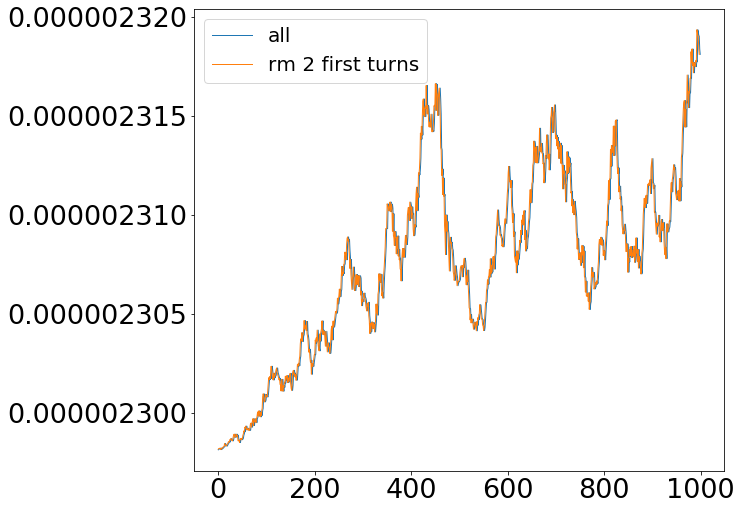

In [12]:
plt.plot(ey_mean_dict[temp_name], label='all')
plt.plot(ey_mean_dict[temp_name][2:], label='rm 2 first turns')
plt.legend()

In [13]:
m_dict = {} # slope of the fit
b_dict = {} # offset
err_dict = {} # error of the gradient of the fit slope

for var in my_variables:
    m_dict[f'{var}'], b_dict[f'{var}'], err_dict[f'{var}'] = [], [], []
    for my_set in range(n_sets):
        temp_name = f'{var}_set{my_set}'
        print(temp_name)
        # linear fit
        
        try:
            [m, b], cov = np.polyfit(tspan[2:], ey_mean_dict[temp_name][2:], 1, cov=True)
            # compute the error of the gradient of the fit slope
            err= np.sqrt(np.diag(cov))
            m_dict[f'{var}'].append(m) # len(m_dict[f'{var}']) = n_runs
            b_dict[f'{var}'].append(b)
            err_dict[f'{var}'].append(err[0])
        except (RuntimeError, TypeError, NameError) as err:
            print("OS error: {0}".format(err))

0.0_set0
0.0_set1
0.0_set2
0.0_set3
0.0_set4
0.0_set5
0.0_set6
0.0_set7
0.0_set8
0.0_set9
0.0_set10
0.0_set11
0.0_set12
0.0_set13
0.0_set14
0.0_set15
0.0_set16
0.0_set17
0.0_set18
0.0_set19
0.012499999999999999_set0
0.012499999999999999_set1
0.012499999999999999_set2
0.012499999999999999_set3
0.012499999999999999_set4
0.012499999999999999_set5
0.012499999999999999_set6
0.012499999999999999_set7
0.012499999999999999_set8
0.012499999999999999_set9
0.012499999999999999_set10
0.012499999999999999_set11
0.012499999999999999_set12
0.012499999999999999_set13
0.012499999999999999_set14
0.012499999999999999_set15
0.012499999999999999_set16
0.012499999999999999_set17
0.012499999999999999_set18
0.012499999999999999_set19
0.024999999999999998_set0
0.024999999999999998_set1
0.024999999999999998_set2
0.024999999999999998_set3
0.024999999999999998_set4
0.024999999999999998_set5
0.024999999999999998_set6
0.024999999999999998_set7
0.024999999999999998_set8
0.024999999999999998_set9
0.024999999999999998

In [14]:
data = {}
for var in my_variables:
    data[f'sigmaZ_{var:.3f}'] =[m_dict[f'{var}'], b_dict[f'{var}'], err_dict[f'{var}']]
df = pd.DataFrame(data, index=['m','b','err'])

filename = f'deyRates_{study_name}Scan.pkl'
if not os.path.exists(filename):
    df.to_pickle(filename)

### Plotting
- Note: To compare with the analytical model use job006b

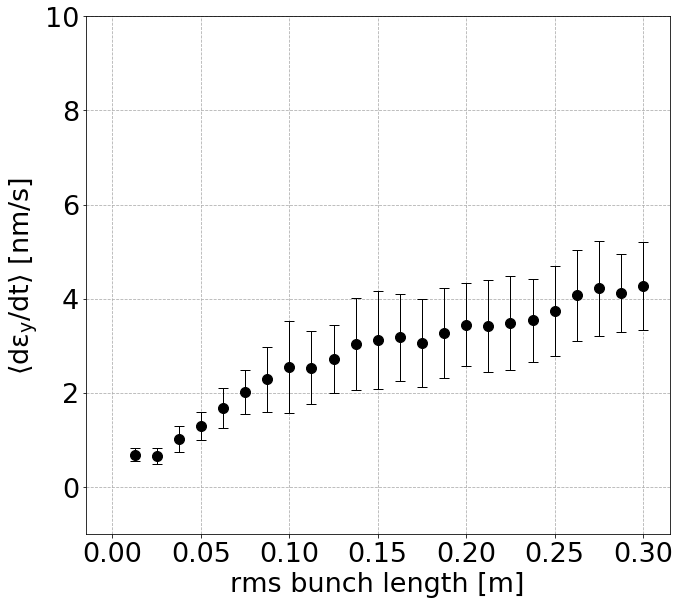

In [18]:
for i, var in enumerate(my_variables):
        
    # errors for study 1
    systematic_error_1 = np.std(m_dict[f'{var}'])
    statistical_error_1 = np.sqrt(np.mean(np.array(err_dict[f'{var}'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
 
    plt.errorbar(my_variables[i], np.mean(m_dict[f'{var}'])*1e9, yerr=total_error_1*1e9, marker='o',  capsize=5, c='k')#, label=my_label_1)
    
plt.xlabel('rms bunch length [m]')
plt.ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s] }$')

plt.ylim(-1, 70)
#plt.ylim(-1, 10)
plt.grid(linestyle='dashed')


plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}Scan_zoom2.png', bbox_inches='tight')